In [3]:
# Build Real time Google Play store data analytics - python
!pip install google-play-scraper

In [4]:
from google_play_scraper import app

# Fetch app data by package name (e.g., com.whatsapp)
result = app('com.whatsapp')

print(result)

{'title': 'WhatsApp Messenger', 'description': 'WhatsApp from Meta is a FREE messaging and video calling app. It’s used by over 2B people in more than 180 countries. It’s simple, reliable, and private, so you can easily keep in touch with your friends and family. WhatsApp works across mobile and desktop even on slow connections, with no subscription fees*.\r\n\r\nPrivate messaging across the world\r\n\r\nYour personal messages and calls to friends and family are end-to-end encrypted. No one outside of your chats, not even WhatsApp, can read or listen to them.\r\n\r\nSimple and secure connections, right away\r\n\r\nAll you need is your phone number, no user names or logins. You can quickly view your contacts who are on WhatsApp and start messaging.\r\n\r\nHigh quality voice and video calls\r\n\r\nMake secure video and voice calls with up to 8 people for free*. Your calls work across mobile devices using your phone’s Internet service, even on slow connections.\r\n\r\nGroup chats to keep 

In [5]:
# Data Storage
# You can store this data in a database like SQLite, PostgreSQL, or MySQL, or use a file format like CSV or JSON.
import csv
data = {
    'app_name': result['title'],
    'rating': result['score'],
    'reviews': result['ratings'],
    'installs': result['installs']
}

# Saving to CSV
with open('playstore_data.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=data.keys())
    writer.writeheader()
    writer.writerow(data)


In [6]:
!pip install schedule

In [7]:
!pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [8]:
!pip install google-play-scraper


In [9]:
# Data Processing and Analysis
# After collecting the data, you can perform various analyses:

# Trends in ratings and reviews over time.
# App category performance comparison.
# Correlation analysis between ratings and installs.
# Example of analyzing the data with pandas:
import pandas as pd

# Load the CSV or database data into a pandas DataFrame
df = pd.read_csv('playstore_data.csv')

# Analysis: Average rating
avg_rating = df['rating'].mean()
print(f"Average rating: {avg_rating}")

Average rating: 4.4251466


In [10]:
!pip install sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [11]:
#data store in database
import sqlite3

# Create database connection
conn = sqlite3.connect('playstore_data.db')
cursor = conn.cursor()

# Create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS app_details (
    id TEXT PRIMARY KEY,
    title TEXT,
    genre TEXT,
    rating REAL,
    installs TEXT,
    last_updated DATE
)''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS reviews (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    app_id TEXT,
    review TEXT,
    rating INTEGER,
    timestamp DATE,
    FOREIGN KEY(app_id) REFERENCES app_details(id)
)''')

conn.commit()
conn.close()

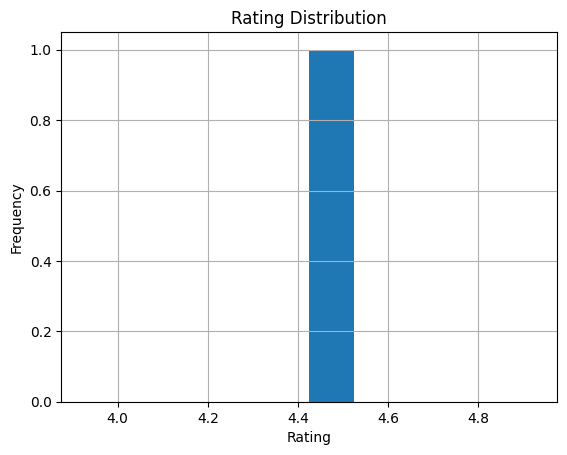

In [12]:
# Visualization
# To present insights, you can use data visualization libraries like matplotlib or seaborn.

# Example of visualizing rating distribution:
import matplotlib.pyplot as plt

df['rating'].hist(bins=10)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [13]:
!pip install matplotlib

In [14]:
!pip install pandas

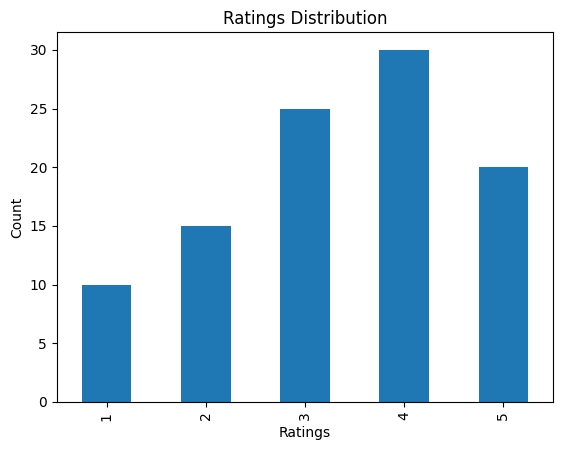

In [15]:
import pandas as pd

# # Read data from the database
# conn = sqlite3.connect('playstore_data.db')
# reviews_df = pd.read_sql_query('SELECT * FROM reviews', conn)

# # Analyze ratings
# rating_counts = reviews_df['rating'].value_counts()
# print(rating_counts)
# Example data: Replace this with your actual ratings data
data = {'rating': [1, 2, 3, 4, 5], 'count': [10, 15, 25, 30, 20]}
ratings_df = pd.DataFrame(data)

# Set the index to ratings for plotting
rating_counts = ratings_df.set_index('rating')['count']

# Plot the data
rating_counts.plot(kind='bar')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

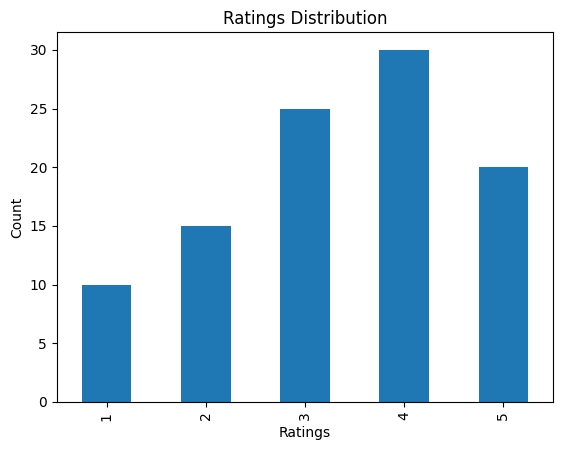

In [16]:
# Handle Missing Data
# If the data is incomplete or there are missing ratings (e.g., no reviews for some stars), explicitly handle them.

# Fix Missing Ratings:
# Fill in missing ratings
all_ratings = pd.Series(index=range(1, 6), data=0)
rating_counts = rating_counts.add(all_ratings, fill_value=0).sort_index()

# Plot the data
rating_counts.plot(kind='bar')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [17]:
# Debugging rating_counts
# If you're still encountering issues, print the variable to inspect its structure:
print(rating_counts)
print(type(rating_counts))

rating
1    10
2    15
3    25
4    30
5    20
dtype: int64
<class 'pandas.core.series.Series'>


In [18]:
# Real-Time Dashboard (Optional)
# For real-time visual analytics, you can use frameworks like Dash or Streamlit to create a dashboard that dynamically 
# updates with the new data collected.

# Example with Streamlit:
!pip install streamlit


In [19]:
# Basic Streamlit code to display data:
import streamlit as st
import pandas as pd

# Load your data
df = pd.read_csv('playstore_data.csv')

st.title('Google Play Store Data Analytics')
st.write(df)

st.bar_chart(df['rating'])

2025-01-08 19:55:06.341 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 19:55:07.239 
  command:

    streamlit run c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-08 19:55:07.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 19:55:07.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 19:55:07.295 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 19:55:08.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 19:55:08.480 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [20]:
# You can run the Streamlit app:
import streamlit as st

st.title('Google Play Store Data Analytics')
st.bar_chart(rating_counts)

2025-01-08 19:57:40.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 19:57:40.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 19:57:40.851 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 19:57:40.853 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()